# 4. Entender y manipular la distribución de intensidades de una imagen.
Lleve a cabo la ecualización del histograma (usando la función de distribución acumulada) de las imágenes de la fachada del punto anterior. 
- ¿Qué diferencias hay entre los histogramas de la imagen tomada de día y la imagen tomada de noche? 
- ¿Cuáles son las transformaciones de ecualización en cada caso?


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageOps

## Histogramas Imagenes Dia

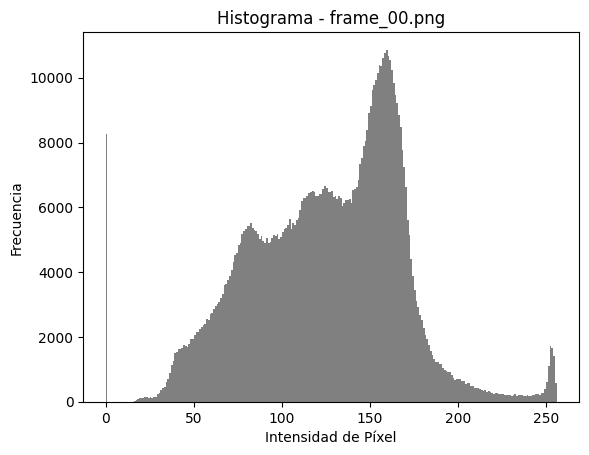

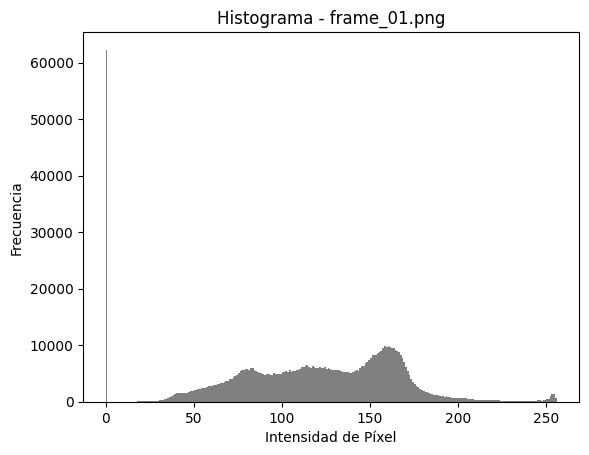

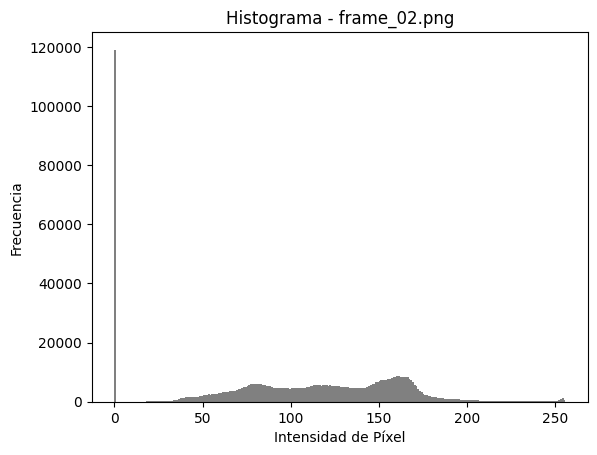

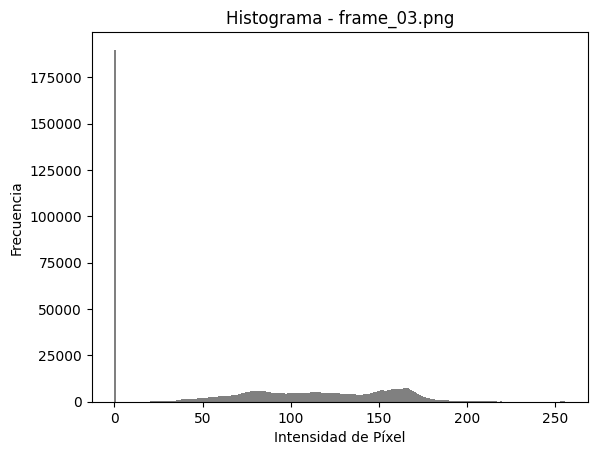

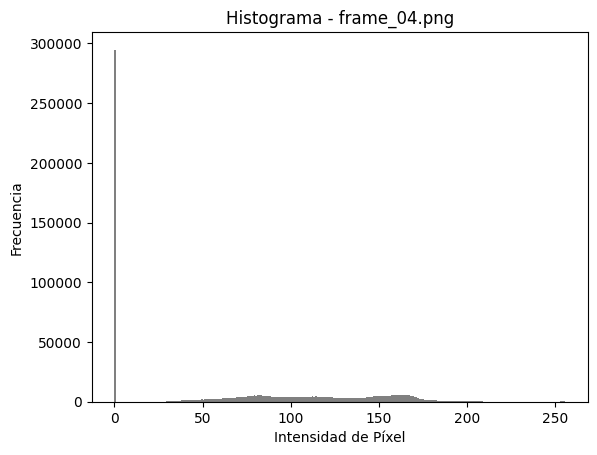

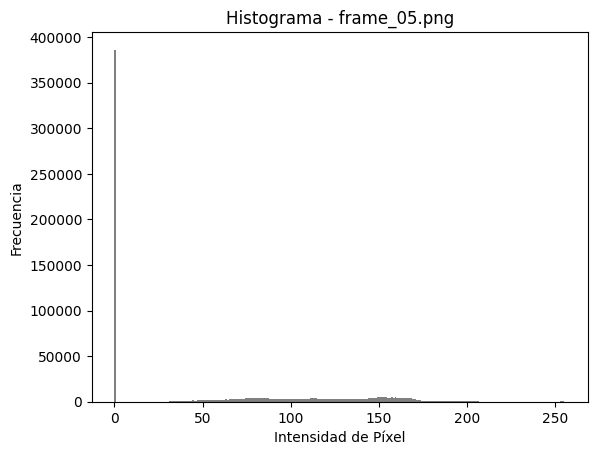

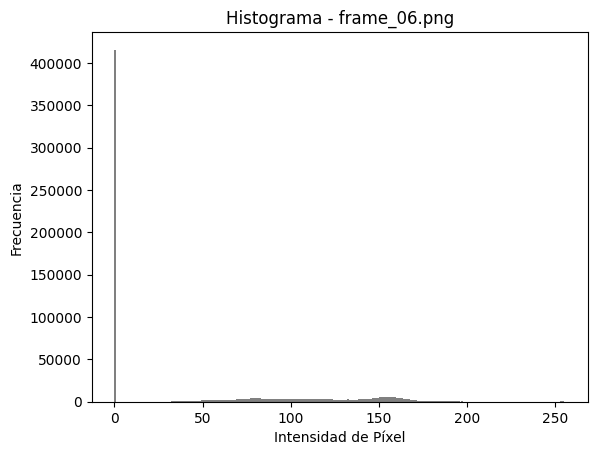

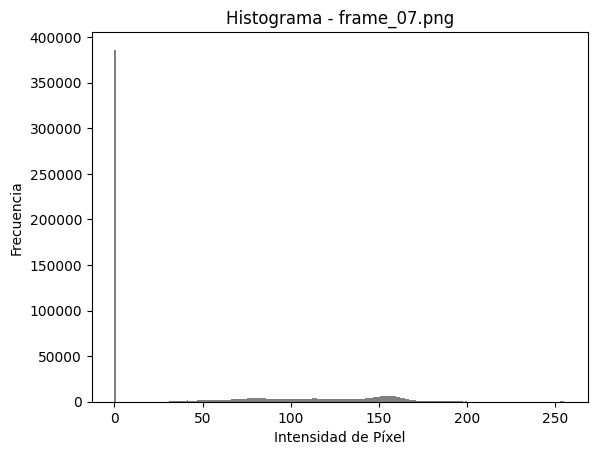

In [4]:
ruta_dia = "./Frames_Gif/ImagenDeDia"
archivos = sorted(os.listdir(ruta_dia))
for nombre_archivo in archivos:
    if nombre_archivo.lower().endswith(('.jpg', '.png', '.jpeg')):
        path_img = os.path.join(ruta_dia, nombre_archivo)

        imagen = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
        if imagen is None:
            continue

        plt.figure()
        plt.hist(imagen.flatten(), bins=256, range=[0, 256], color='gray')
        plt.title(f"Histograma - {nombre_archivo}")
        plt.xlabel("Intensidad de Píxel")
        plt.ylabel("Frecuencia")
        plt.show()


## Histogramas Imágenes Noche

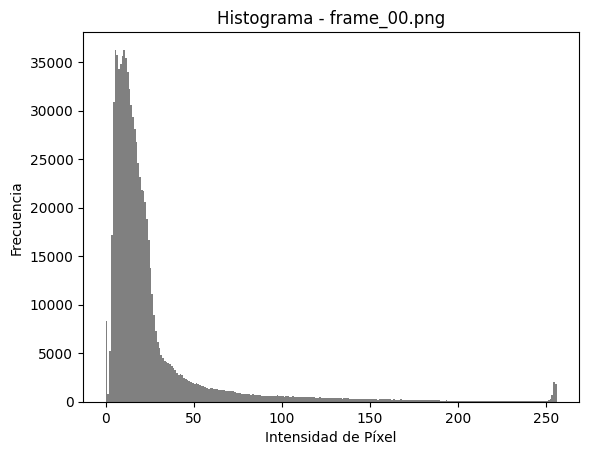

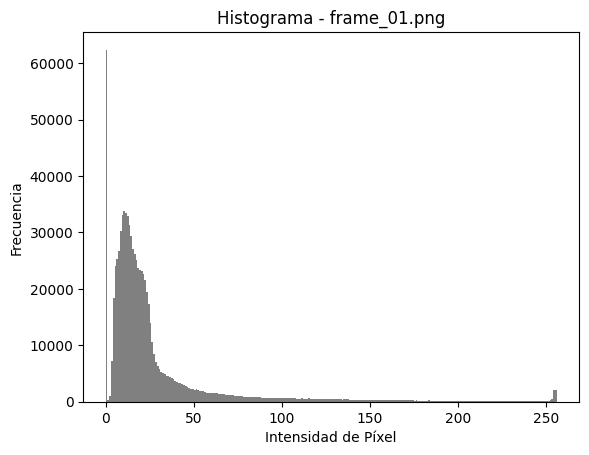

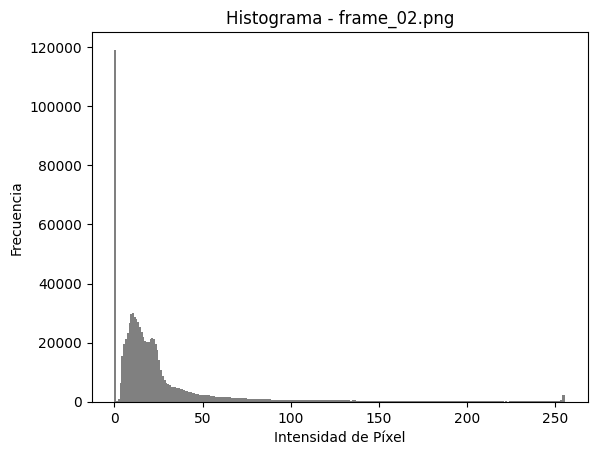

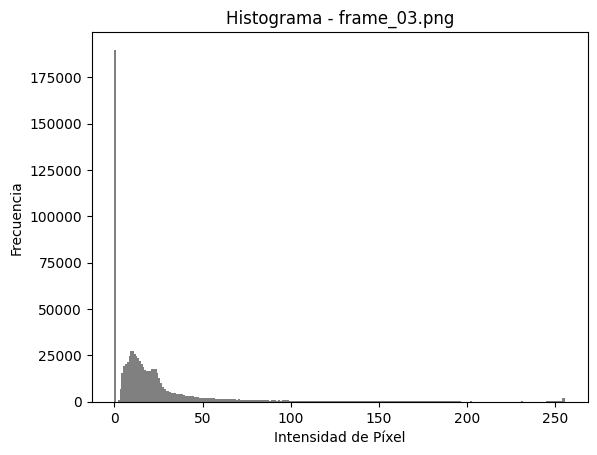

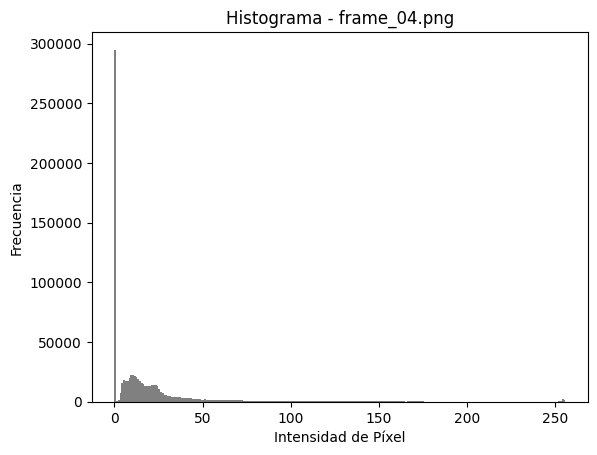

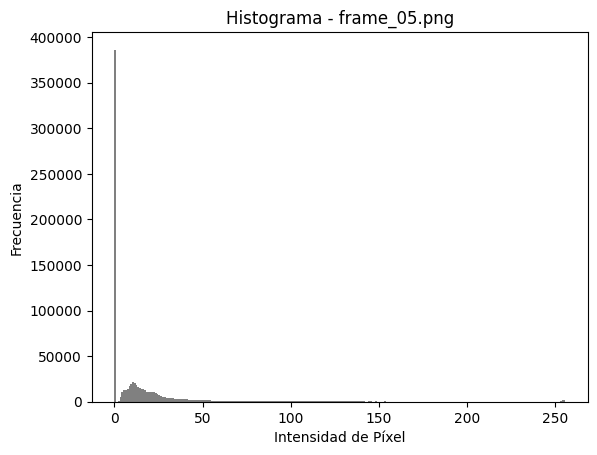

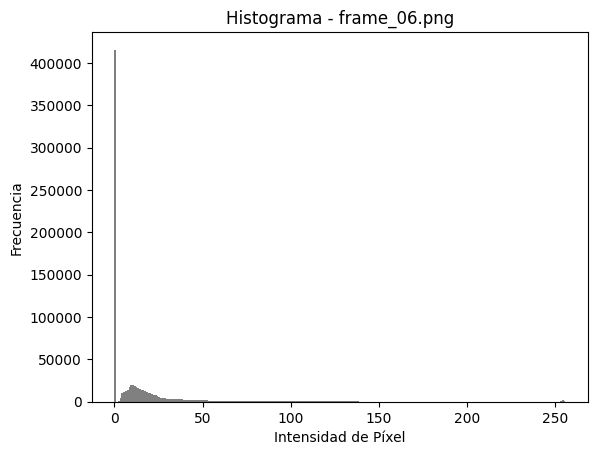

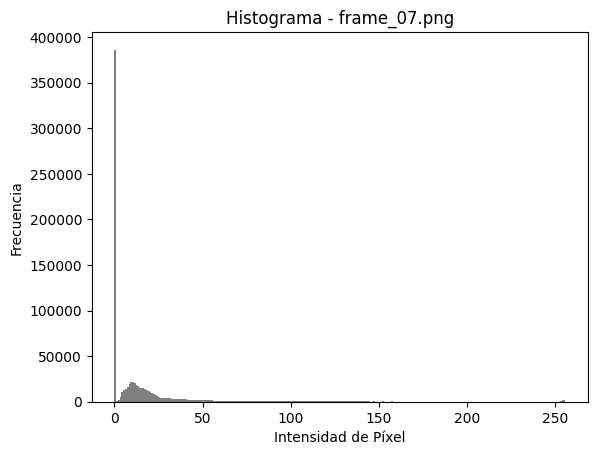

In [5]:
ruta_noche = "./Frames_Gif/ImagenDeNoche"
archivos = sorted(os.listdir(ruta_noche))
for nombre_archivo in archivos:
    if nombre_archivo.lower().endswith(('.jpg', '.png', '.jpeg')):
        path_img = os.path.join(ruta_noche, nombre_archivo)

        imagen = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
        if imagen is None:
            continue

        plt.figure()
        plt.hist(imagen.flatten(), bins=256, range=[0, 256], color='gray')
        plt.title(f"Histograma - {nombre_archivo}")
        plt.xlabel("Intensidad de Píxel")
        plt.ylabel("Frecuencia")
        plt.show()


## Ecualizacion Imagenes Dia

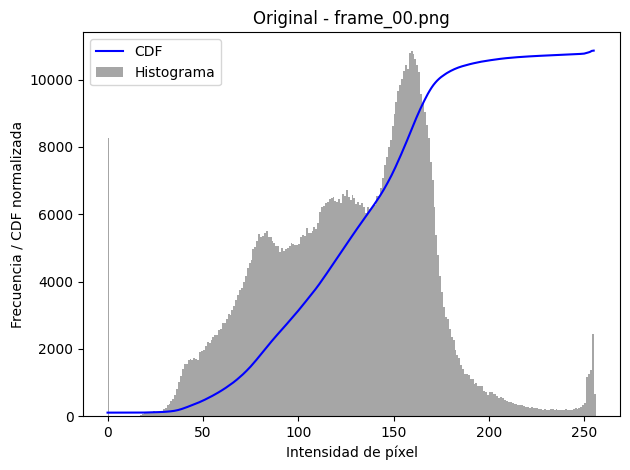

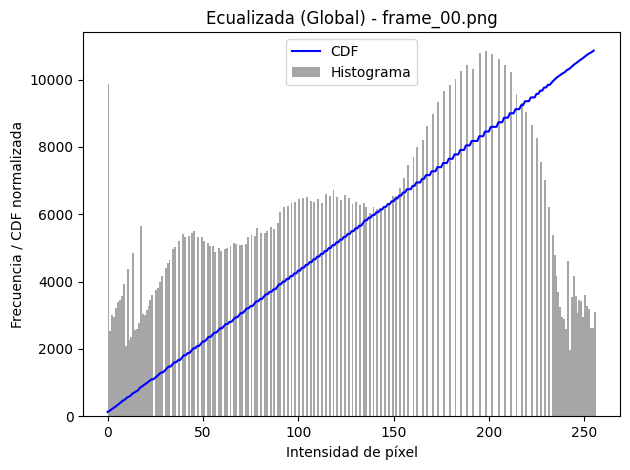

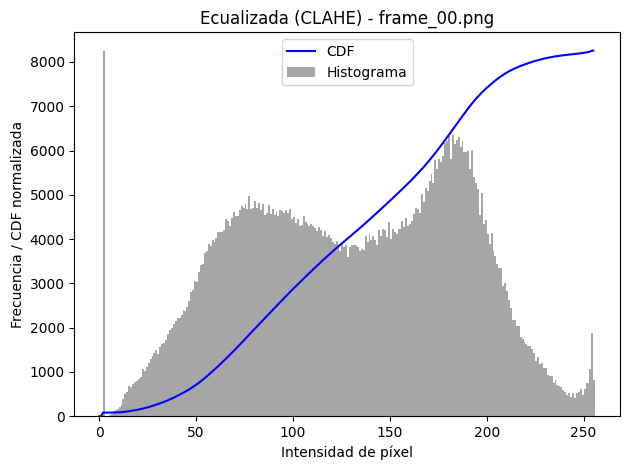

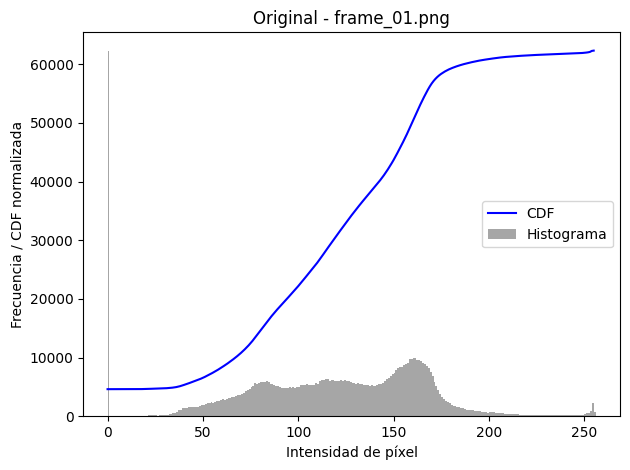

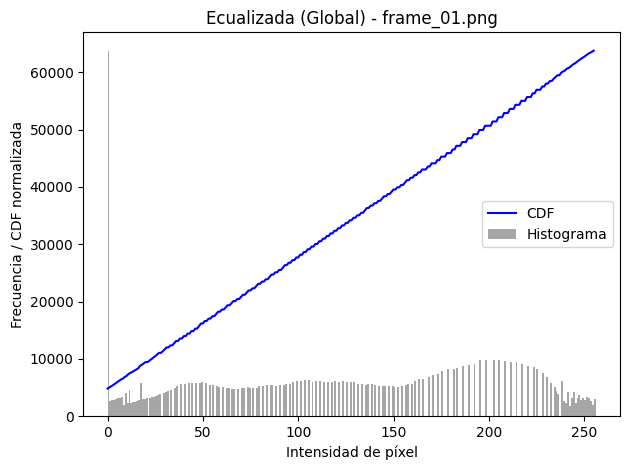

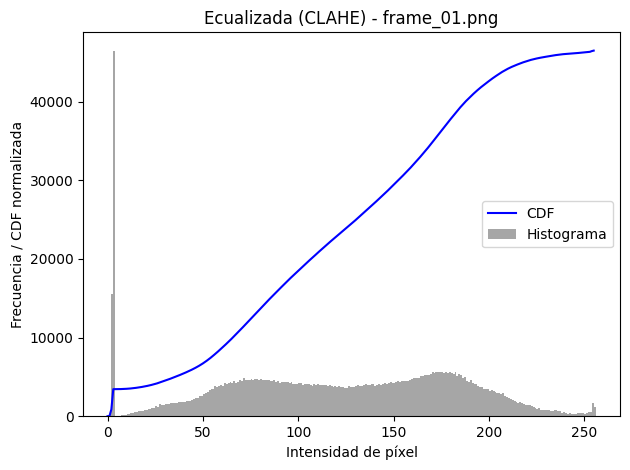

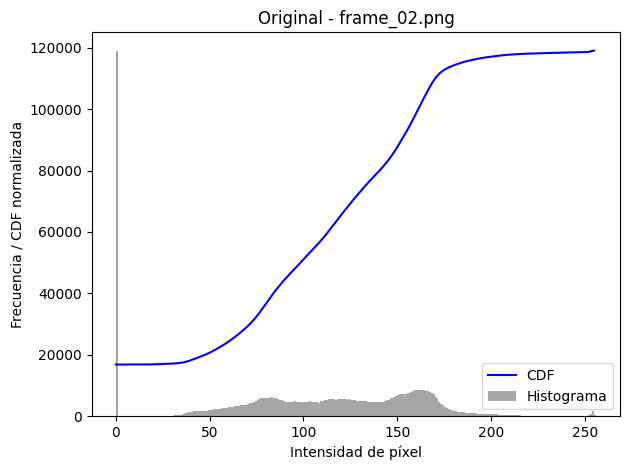

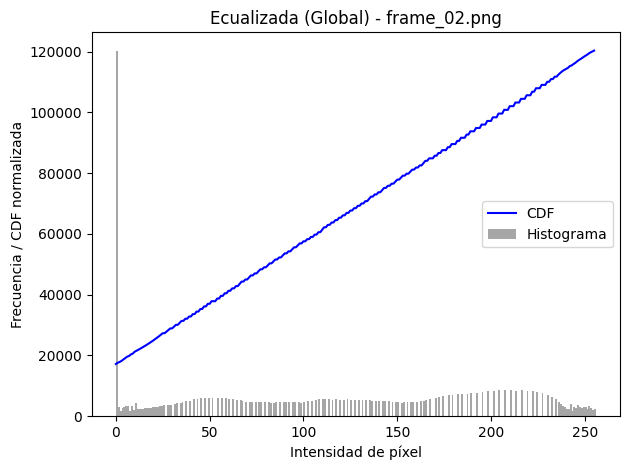

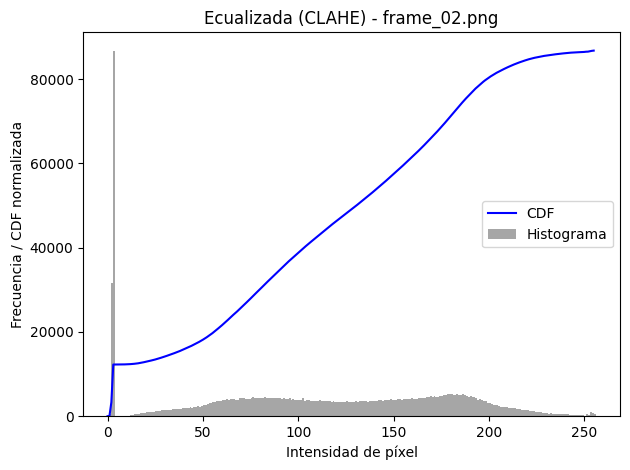

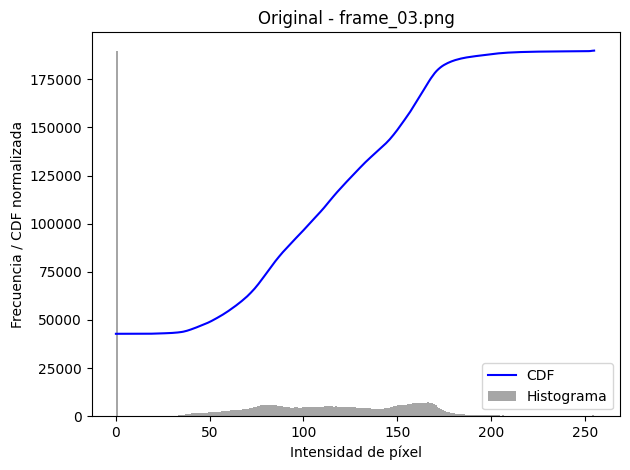

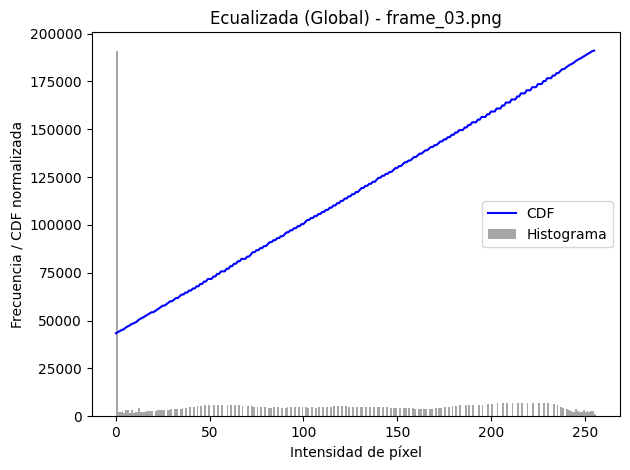

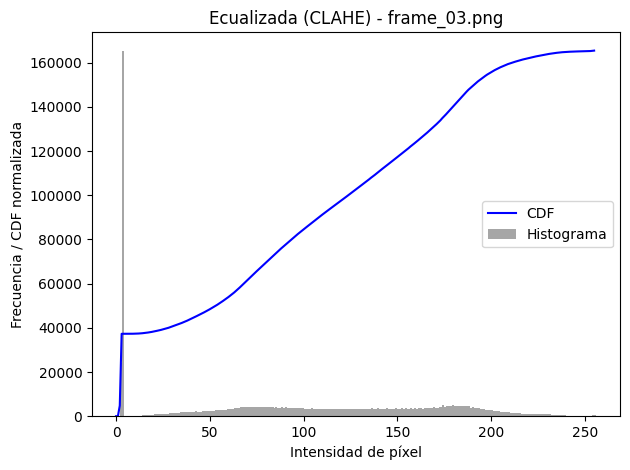

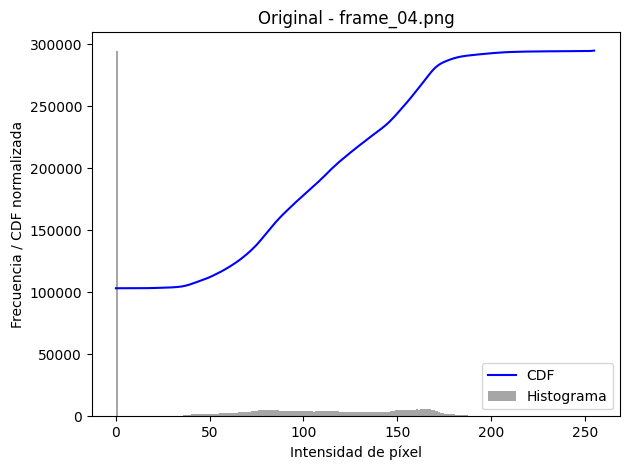

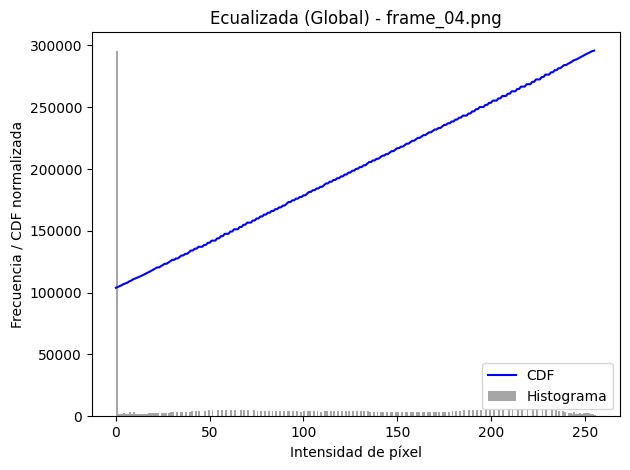

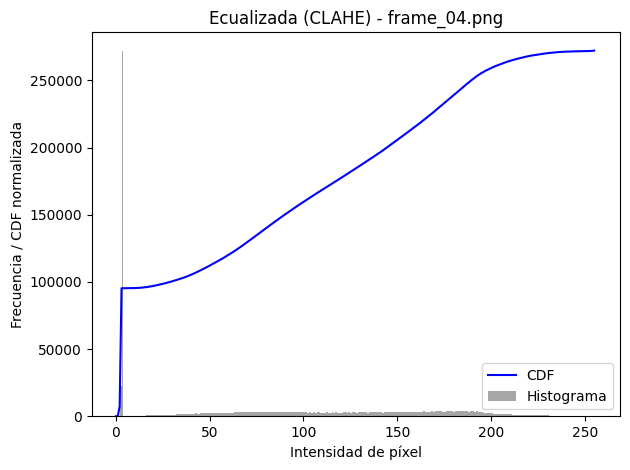

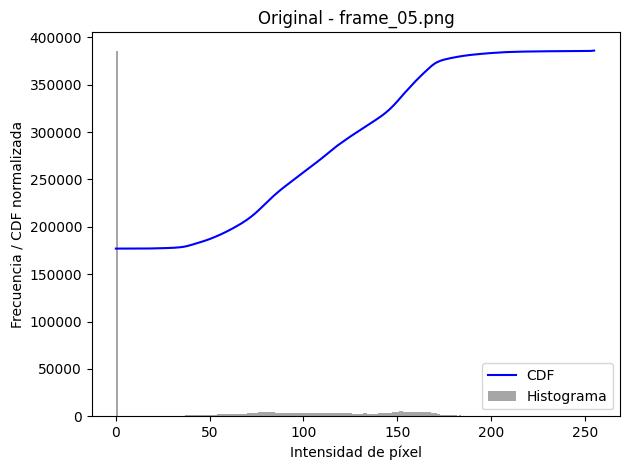

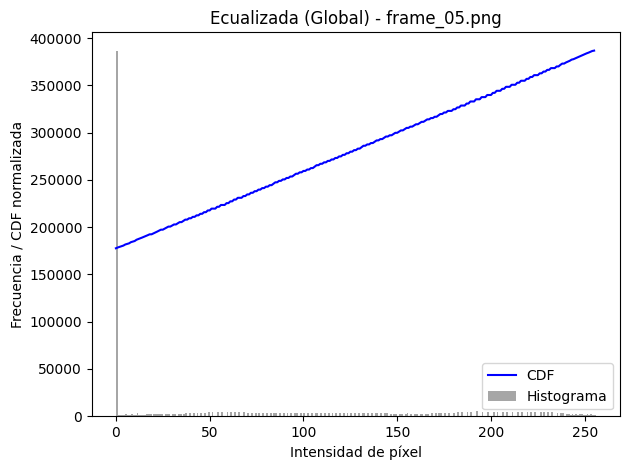

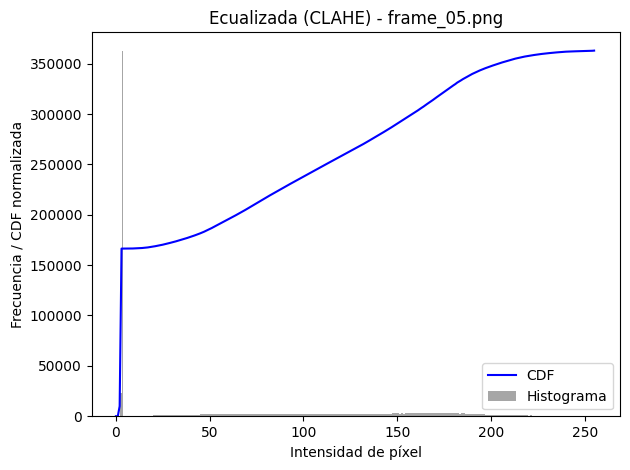

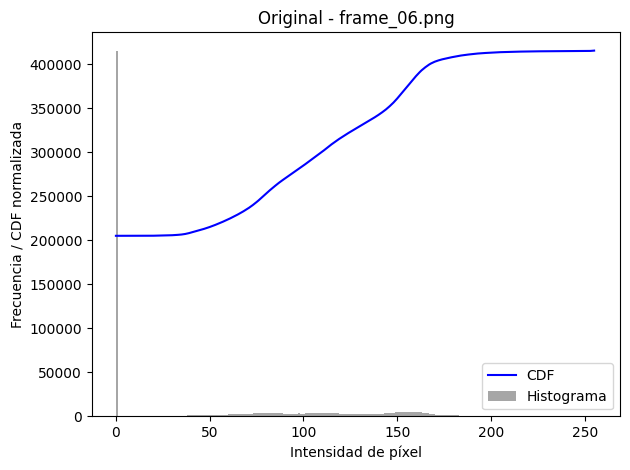

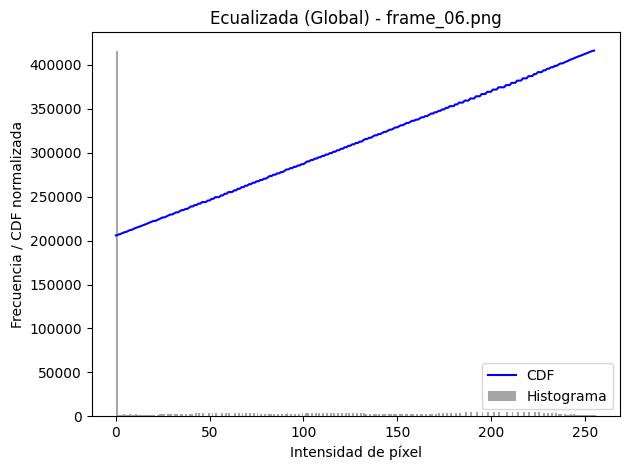

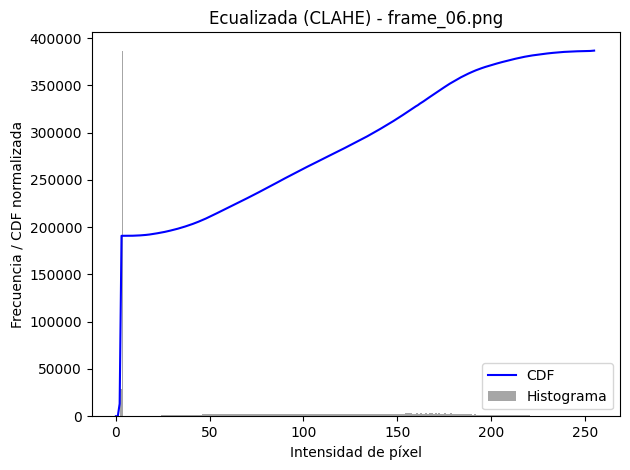

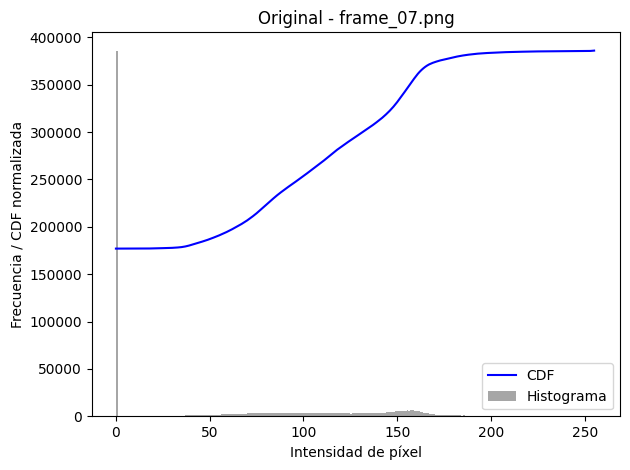

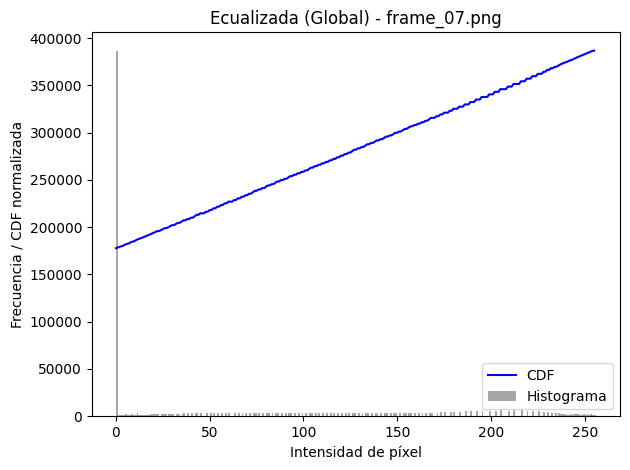

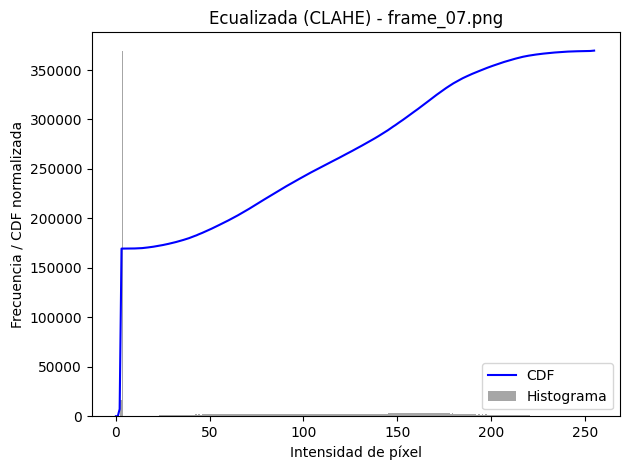

In [8]:
ruta = "./Frames_Gif/ImagenDeDia"
salida_eq = os.path.join(ruta, "equalizadas")
salida_clahe = os.path.join(ruta, "clahe")
os.makedirs(salida_eq, exist_ok=True)
os.makedirs(salida_clahe, exist_ok=True)

def plot_hist_cdf(img, titulo):
    img_flat = img.ravel()
    hist, _ = np.histogram(img_flat, bins=256, range=[0,256])
    cdf = hist.cumsum()
    cdf_norm = cdf * (hist.max() / cdf.max())

    plt.figure()
    plt.hist(img_flat, bins=256, range=[0,256], color='gray', alpha=0.7)
    plt.plot(cdf_norm, 'b')
    plt.title(titulo)
    plt.xlabel("Intensidad de píxel")
    plt.ylabel("Frecuencia / CDF normalizada")
    plt.legend(['CDF', 'Histograma'])
    plt.tight_layout()
    plt.show()

archivos = sorted(os.listdir(ruta))

for nombre in archivos:
    if not nombre.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue
    path = os.path.join(ruta, nombre)

    try:
        pil_img = Image.open(path)
        pil_img = ImageOps.exif_transpose(pil_img)
        img = np.array(pil_img)  # RGB
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    except Exception:
        img = cv2.imread(path)

    if img is None:
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plot_hist_cdf(gray, f"Original - {nombre}")

    eq = cv2.equalizeHist(gray)
    cv2.imwrite(os.path.join(salida_eq, f"EQ_{nombre}"), eq)
    plot_hist_cdf(eq, f"Ecualizada (Global) - {nombre}")

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    eq_clahe = clahe.apply(gray)
    cv2.imwrite(os.path.join(salida_clahe, f"CLAHE_{nombre}"), eq_clahe)
    plot_hist_cdf(eq_clahe, f"Ecualizada (CLAHE) - {nombre}")
